In [36]:
# Forming and Splitting the Dataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    bias=0.5,
    noise=10,
    shuffle=True,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

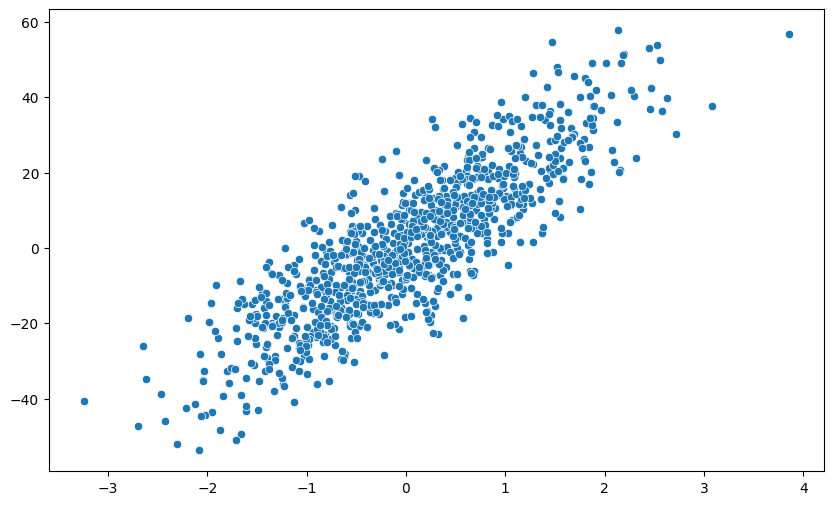

In [37]:
# Visualizing the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=[10, 6])
sns.scatterplot(x=np.squeeze(X), y=y)
plt.show()

In [38]:
# Building and Training the model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(
        max_depth=3,
        max_features=0.75,
        random_state=42
    ),
    n_estimators=500,
    learning_rate=0.5,
    random_state=42
)

model.fit(X_train, y_train)

,estimator,DecisionTreeR...ndom_state=42)
,n_estimators,500
,learning_rate,0.5
,loss,'linear'
,random_state,42
,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [ ]:
# Evaluating the model
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R2_score = {score}")
print(F"Adjusted R2_score = {1 - ((1 - score) * (len(X_test) - 1) / (len(X_test) - 1 - X_test.shape[1]))}") # There is only one feature so no need to calculate this

R2_score = 0.7024030719792509
Adjusted R2_score = 0.701203084366264


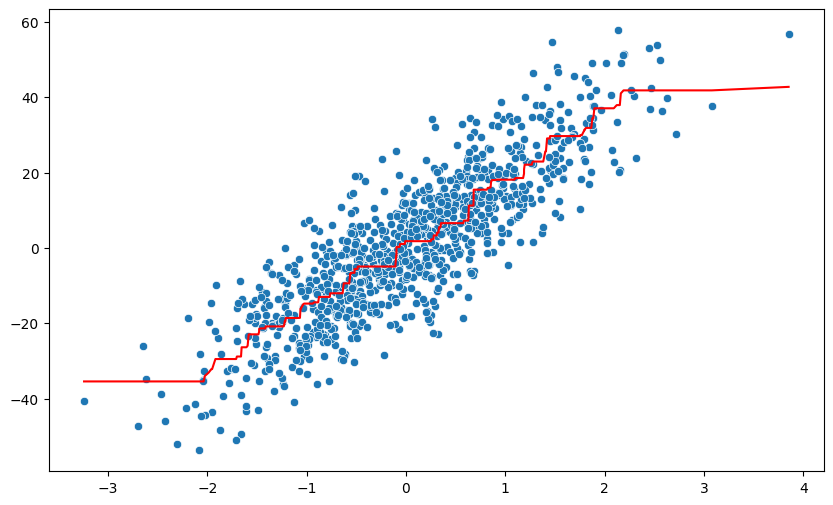

In [40]:
# Best Fit Line
X_sorted = np.sort(X.ravel())
y_pred = model.predict(X_sorted.reshape(-1, 1))

plt.figure(figsize=[10, 6])
sns.lineplot(x=X_sorted, y=y_pred, color='red')
sns.scatterplot(x=X.ravel(), y=y)
plt.show()